<a href="https://colab.research.google.com/github/orlandxrf/curso-dl/blob/main/notebooks/6c_CNN_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Convolucional con el Conjunto MNIST

In [ ]:
# bibliotecas empleadas
import matplotlib.pyplot as plt

import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader, TensorDataset, SubsetRandomSampler, ConcatDataset
from torch.nn import functional as F

# torchvision contiene conjuntos de datos populares, arquitecturas de modelos famosos y transformaciones de imágenes comunes
import torchvision 

# !pip install torchsummary
from torchsummary import summary


## Trabajar con el conjunto de datos Fashion-MNIST
### Como crear una imagen con la bliblioteca `pillow` (`PIL`)

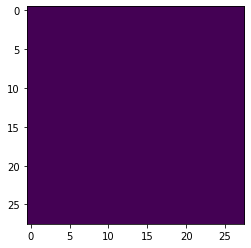

In [ ]:
from PIL import Image

img  = Image.new(mode="L", size=(28,28))
plt.imshow(img)
print ('\n')


### Descargar el dataset Fashion-MNIST

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

longitud del conjunto de entrenamiento 60,000
longitud del conjunto de prueba 10,000

(<PIL.Image.Image image mode=L size=28x28 at 0x7FAF1514AB10>, 9)
<PIL.Image.Image image mode=L size=28x28 at 0x7FAE1055B6D0>


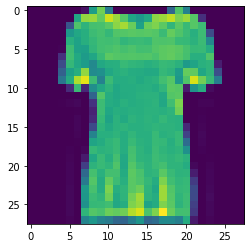

In [ ]:
dataset_path = 'data'
train_dataset = torchvision.datasets.FashionMNIST(dataset_path, train=True, download=True)
test_dataset  = torchvision.datasets.FashionMNIST(dataset_path, train=False, download=True)

print (f"longitud del conjunto de entrenamiento {len(train_dataset):,}")
print (f"longitud del conjunto de prueba {len(test_dataset):,}\n")

print (train_dataset[0])
print (train_dataset[0][0])

plt.imshow(train_dataset[10][0])

### Transformar la imagen a tensores
La función `torchvision.Compose` crea una serie de transformaciones para preparar nuestro conjunto de datos.<br>
<br>
La función `torchvision.transforms.ToTenser` convierte una imagen `PIL` (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) o `numpy.ndarray` (H x W x C) en el rango `[0, 255]` a un `torch.FloatTensor` de forma Canal, Alto, Ancho (C x H x W) en el rango `[0.0, 1.0]`.


In [ ]:
transform = torchvision.transforms.Compose([
  torchvision.transforms.ToTensor(),                                 
])

# transformar el conjunto de imágenes a tensores
train_dataset.transform = transform
test_dataset.transform = transform

print (f"longitud del conjunto de entrenamiento {len(train_dataset):,}")
print (f"longitud del conjunto de prueba {len(test_dataset):,}\n")

print (train_dataset.data.size())
print (test_dataset.data.size())


labels = {
  0: "T-Shirt",
  1: "Trouser",
  2: "Pullover",
  3: "Dress",
  4: "Coat",
  5: "Sandal",
  6: "Shirt",
  7: "Sneaker",
  8: "Bag",
  9: "Ankle Boot"
}
print (f'\nEtiquetas (Clases): {labels}')

longitud del conjunto de entrenamiento 60,000
longitud del conjunto de prueba 10,000

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])

Etiquetas (Clases): {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}


Shape img: torch.Size([1, 28, 28])
Shape img: torch.Size([28, 28])


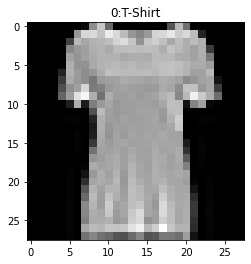

In [ ]:
img, label = train_dataset[10]
plt.title(f'{label}:{labels[label]}')
# plt.axis("off") # no mostrar los ejes
# visualizar [channel, height, width]
print (f"Shape img: {img.size()}")
# remover el canal
print (f"Shape img: {img.squeeze().size()}")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()


### Random Split
---
la función [`random_split(dataset, lengths)`](https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split) divide aleatoriamente un conjunto de datos en nuevos conjuntos de datos de longitudes dadas que no se superponen.<br>

Si se desea crear conjuntos de validación a partir del conjunto de entrenamiento, esto se puede manejar fácilmente usando la función `random_split` de las utilidades de datos de `PyTorch`. La función `random_split` toma un conjunto de datos y los tamaños deseados de los subconjuntos en una lista y divide automáticamente los datos en un orden aleatorio para generar objetos de conjunto de datos más pequeños que se pueden usar de inmediato con DataLoader.
<br>
`random_split` funciona directamente en el conjunto de datos. La función espera 2 argumentos de entrada. El primer argumento es el conjunto de datos. El segundo es una tupla de longitudes. Si queremos dividir nuestro conjunto de datos en 2 partes, proporcionaremos una tupla con 2 números. Estos números son los tamaños de los conjuntos de datos correspondientes después de la división.


In [ ]:
# ejemplo de como funciona random_split
from torch.utils.data import random_split

# torch.manual_seed(0)

my_dataset_X = [i for i in range(10)]

print (f"dataset_original: {my_dataset_X}")

my_dataset_X, my_dataset_V = random_split(my_dataset_X, (7, 3)) # 3 + 7 = 10

print (f"dataset_entrenamiento: {list(my_dataset_X)}")
print (f"dataset_validación: {list(my_dataset_V)}")


dataset_original: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
dataset_entrenamiento: [9, 3, 1, 4, 2, 8, 5]
dataset_validación: [0, 6, 7]


---
### Obtener el conjunto de validación a partir del conjunto de entrenamiento

In [ ]:
# seleccionar 
train_data, val_data = random_split(train_dataset, (48000, 12000)) # 48,000 + 12,000 = 60,000

print (f"longitud del conjunto de entrenamiento {len(train_data):,}")
print (f"longitud del conjunto de prueba {len(val_data):,}")


longitud del conjunto de entrenamiento 48,000
longitud del conjunto de prueba 12,000


### Definir los cargadores para los conjuntos de datos y el número de batches

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_data, batch_size=batch_size)
valid_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

print(f"Número de batches en train_loader: {len(train_loader):,}")
print(f"Número de batches en valid_loader: {len(valid_loader):,}")
print(f"Número de batches en test_loader: {len(test_loader):,}\n")

print(f"Número de muestras en train_loader: {len(train_loader.sampler):,}")
print(f"Número de muestras en valid_loader: {len(valid_loader.sampler):,}")
print(f"Número de muestras en test_loader: {len(test_loader.sampler):,}")

Número de batches en train_loader: 375
Número de batches en valid_loader: 94
Número de batches en test_loader: 79

Número de muestras en train_loader: 48,000
Número de muestras en valid_loader: 12,000
Número de muestras en test_loader: 10,000


## Definir la Red Convolucional
La red que definiremos tendrá dos capas convolucionales (CNN) y dos capas completamente conectadas (FC). Cada capa de convolución es seguida por la función de activación ReLU, posteriormente los resultados se pasan a una capa de agrupamiento.<br>
<br>
La función de vista remodela los datos en una matriz unidimensional, que se pasará a la capa lineal. La segunda capa completamente conectada, también llamada capa de salida, clasificará la imagen como uno de los 10 dígitos.<br>
<br>


![RedCNN](https://drive.google.com/uc?id=10uMS9_9qmV4gNxeWmAIrOc6M5KTCked8)
<br>
<br>
La Figura se generó en [http://alexlenail.me/NN-SVG/LeNet.html](http://alexlenail.me/NN-SVG/LeNet.html)

In [ ]:
class ConvNet(nn.Module):
  def __init__(self, hidden_layer=100):
    super(ConvNet, self).__init__()

    # definimos las capas de convolución (CNN)
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)

    # definimos las capas lineales (FC)
    self.fc1 = nn.Linear(32 * 7 * 7, hidden_layer) 
    self.fc2 = nn.Linear(hidden_layer, 10)
    
    # ((input_h - kernel_h + 2 * padding_h) / stride_h) + 1

  def forward(self, x):
    # definimos el agrupamiento para la primera convolución
    out = self.conv1(x) # (1, 28, 28)   ((28-5 + 2*2) / 1) + 1 = [128, 16, 28, 28] # height 

    # aplicamos la operación de agrupamiento máximo
    # pytorch docs: stride -> the stride of the window. Default value is kernel_size
    max_pool1 = F.max_pool2d(out, kernel_size=2) # (28, 28) = ((28-2 + 2*0)/2)+1 = 14 = [128, 16, 14, 14]  
    
    # aplicamos la función ReLU al agrupamiento obtenido
    out = F.relu(max_pool1) # [128, 16, 14, 14]
  
    # definimos el agrupamiento para la segunda convolución
    out = self.conv2(out) #  [128, 32, 14, 14]

    # aplicamos la operación de agrupamiento máximo
    max_pool2 = F.max_pool2d(out, kernel_size=2) # [128, 32, 7, 7]
    
    # aplicamos la función ReLU al agrupamiento obtenido
    out = F.relu(max_pool2) # 

    # aplanar (flatenning) [128, 32, 7, 7]
    out = out.view(out.size(0), -1) # [128, 1568]
    
    out = F.relu(self.fc1(out))
    # out = self.drop2(out)

    # La segunda capa (salida), clasificará la imagen en uno de los 10 dígitos (clases)
    return self.fc2(out)
  
print (ConvNet())

ConvNet(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=1568, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


## Entrenamiento
Para entrenar la red CNN podemos definir el `torch.device` para entrenar el modelo con un acelerador de hardware como la GPU si se dispone o en caso contrario con CPU.


In [ ]:
# device = torch.device("gpu" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print (f"Hardware disponible: {device}\n")

# fijar valor
torch.manual_seed(0)

# instanciar la CNN en la variable "modelo"
model = ConvNet()

# establecer el hardware actual
print (model.to(device))

# definir el optimizador
optimizer = optim.Adam(model.parameters(), lr=0.002)

# definir la función de error
loss_function = nn.CrossEntropyLoss()

print ('\n')

print (summary(model, input_size=(1, 28, 28)))

Hardware disponible: cpu

ConvNet(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=1568, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             416
            Conv2d-2           [-1, 32, 14, 14]          12,832
            Linear-3                  [-1, 100]         156,900
            Linear-4                   [-1, 10]           1,010
Total params: 171,158
Trainable params: 171,158
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.14
Params size (MB): 0.65
Estimated Total Size (MB): 0.80
-----------------------------------------------

In [ ]:
history={
  'train_loss': [],
  'valid_loss': [],
  'train_acc': [],
  'valid_acc': []
}

EPOCHS = 10

for epoch in range(EPOCHS):
  train_loss, train_correct = 0.0, 0

  # indicamos que se calculará el gradiente (Entrenamiento) 
  model.train()

  # recorremos el conjunto de entrenamiento en los batches definidos
  for images, labels in train_loader:

    # images.size() = [128, 1, 28, 28]
    # labels = [128]

    # definir el hardware disponible a las imágenes y a las clases
    images,labels = images.to(device), labels.to(device)
    
    optimizer.zero_grad()

    output = model(images)
    loss = loss_function(output,labels)
    loss.backward()
    optimizer.step()
    train_loss += loss.item() * images.size(0)
    scores, predictions = torch.max(output.data, 1)
    train_correct += (predictions == labels).sum().item()    
    
  valid_loss, val_correct = 0.0, 0

  # indicamos que no se calculará el gradiente (Validación) 
  model.eval()
  
  for images, labels in valid_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    loss = loss_function(output, labels)
    valid_loss+=loss.item()*images.size(0)
    scores, predictions = torch.max(output.data,1)
    val_correct+=(predictions == labels).sum().item()

  # calcular los promedios tanto de la pérdida como de la excatitud en ambos datasets (train, valid)
  train_loss = train_loss / len(train_loader.sampler)
  train_acc = train_correct / len(train_loader.sampler)*100
  valid_loss = valid_loss / len(valid_loader.sampler)
  valid_acc = val_correct / len(valid_loader.sampler) * 100

  print(f"Epoch:{epoch+1}/{EPOCHS}\tTrain Loss:{train_loss:.4f} Validation Loss:{valid_loss:.4f}\tTrain Accuracy:{train_acc:.2f}% Validation Accuracy:{valid_acc:.2f}%")

  history['train_loss'].append(train_loss)
  history['valid_loss'].append(valid_loss)
  history['train_acc'].append(train_acc)
  history['valid_acc'].append(valid_acc)

Epoch:1/10	Train Loss:0.5552 Validation Loss:0.3730	Train Accuracy:79.58% Validation Accuracy:86.38%
Epoch:2/10	Train Loss:0.3454 Validation Loss:0.2933	Train Accuracy:87.37% Validation Accuracy:89.40%
Epoch:3/10	Train Loss:0.2889 Validation Loss:0.2684	Train Accuracy:89.31% Validation Accuracy:90.17%
Epoch:4/10	Train Loss:0.2549 Validation Loss:0.2615	Train Accuracy:90.58% Validation Accuracy:90.37%
Epoch:5/10	Train Loss:0.2283 Validation Loss:0.2596	Train Accuracy:91.51% Validation Accuracy:90.48%
Epoch:6/10	Train Loss:0.2061 Validation Loss:0.2447	Train Accuracy:92.47% Validation Accuracy:91.02%
Epoch:7/10	Train Loss:0.1879 Validation Loss:0.2457	Train Accuracy:93.10% Validation Accuracy:91.26%
Epoch:8/10	Train Loss:0.1723 Validation Loss:0.2519	Train Accuracy:93.64% Validation Accuracy:91.17%
Epoch:9/10	Train Loss:0.1560 Validation Loss:0.2538	Train Accuracy:94.25% Validation Accuracy:91.36%
Epoch:10/10	Train Loss:0.1416 Validation Loss:0.2594	Train Accuracy:94.71% Validation Accur

## Evaluar el modelo CNN en el conjunto de prueba


In [ ]:
correct = 0
total = 0
test_loss = 0

with torch.no_grad():
  for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)

    loss = loss_function(outputs,labels)
    test_loss += loss.item() * images.size(0)
    
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_loader.sampler)

print(f'Test Accuracy : {100 * correct / total:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

Test Accuracy : 90.71%
Test Loss: 0.2856


## Visualizar Loss y Accuray

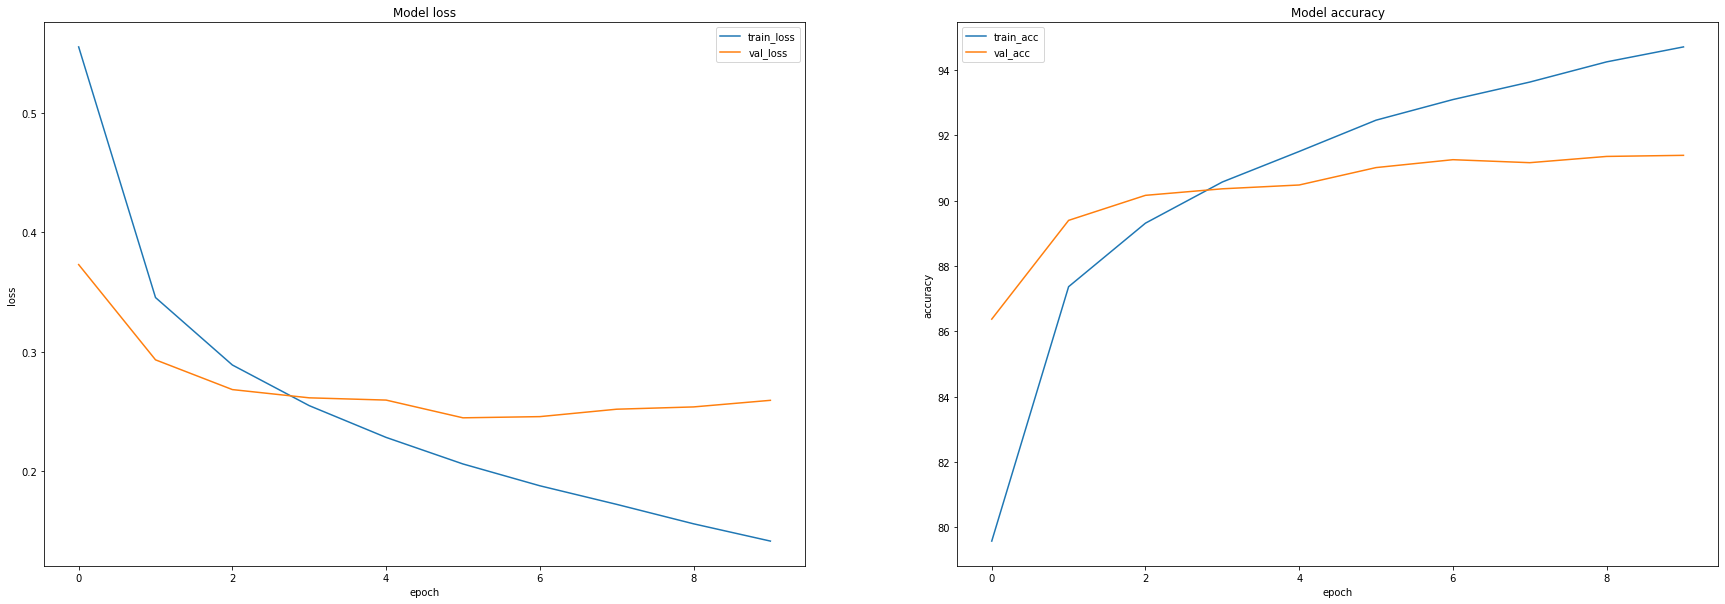

In [ ]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'])
plt.plot(history['valid_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='best')
# plt.show()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'])
plt.plot(history['valid_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='best')
plt.show()



## Visualizar los filtros
Es posible visualizar los filtros aprendidos, utilizados por la CNN al aplicar la operación convolución y obtener los mapas de características, que contienen las características extraídas de la capa anterior. 

Para obtener estos filtros se tiene que iterar a través de todas las capas de los modelos `list(model.children())`. Si la capa es convolucional, podemos almacenar el peso en la lista `model_weights`, que contendrá los filtros utilizados en las dos capas convolucionales.

In [ ]:
model_weights = [] 
conv_layers = [] 
model_children = list(model.children())

# contador de las capas convolucionales
counter = 0

# agregar todas las capas de convolución y sus respectivos pesos a la lista
for i in range(len(model_children)):
    
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])

    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)

print(f"Total de Capas Convolucionales: {counter}")

Total de Capas Convolucionales: 2


Visualizar la forma (shape) de los filtros encontrados

In [ ]:
for weight, conv in zip(model_weights, conv_layers):
    print(f"CONVOLUCIÓN: {conv} \t\t SHAPE: {weight.shape}")

CONVOLUCIÓN: Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)) 		 SHAPE: torch.Size([16, 1, 5, 5])
CONVOLUCIÓN: Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)) 		 SHAPE: torch.Size([32, 16, 5, 5])


### Visualizar los filtros aprendidos de la primera capa de convolución

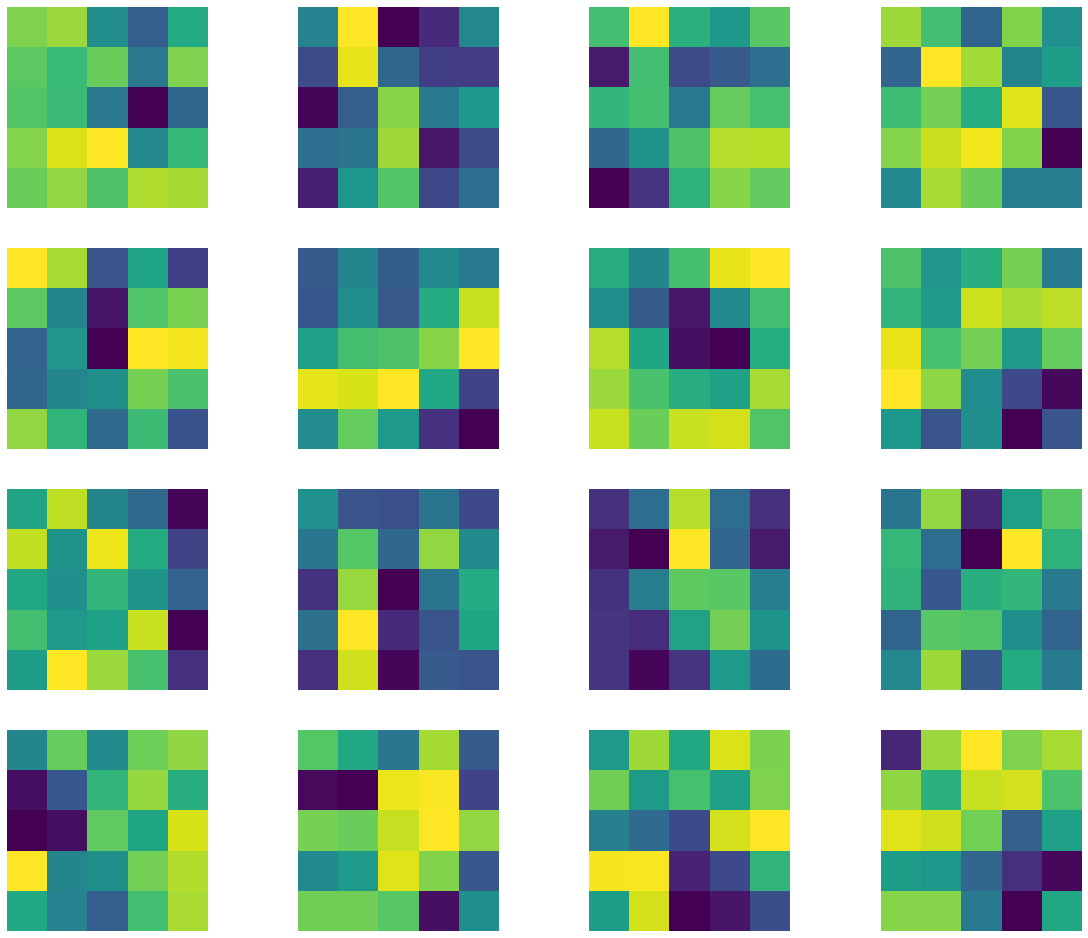

In [ ]:
# visualizar los filtros aprendidos de la primera capa de convolución
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(4, 4, i+1) # filtros de 5x5 con un total de 16 SHAPE: torch.Size([16, 1, 5, 5])
    plt.imshow(filter[0, :, :].detach().cpu().numpy(), cmap='viridis') # convertir el tensor a numpy array
    plt.axis('off') # no visualizar los ejes
    plt.savefig('16_filtros.png')
plt.show()

### Visualizar los filtros aprendidos de la segunda capa de convolución

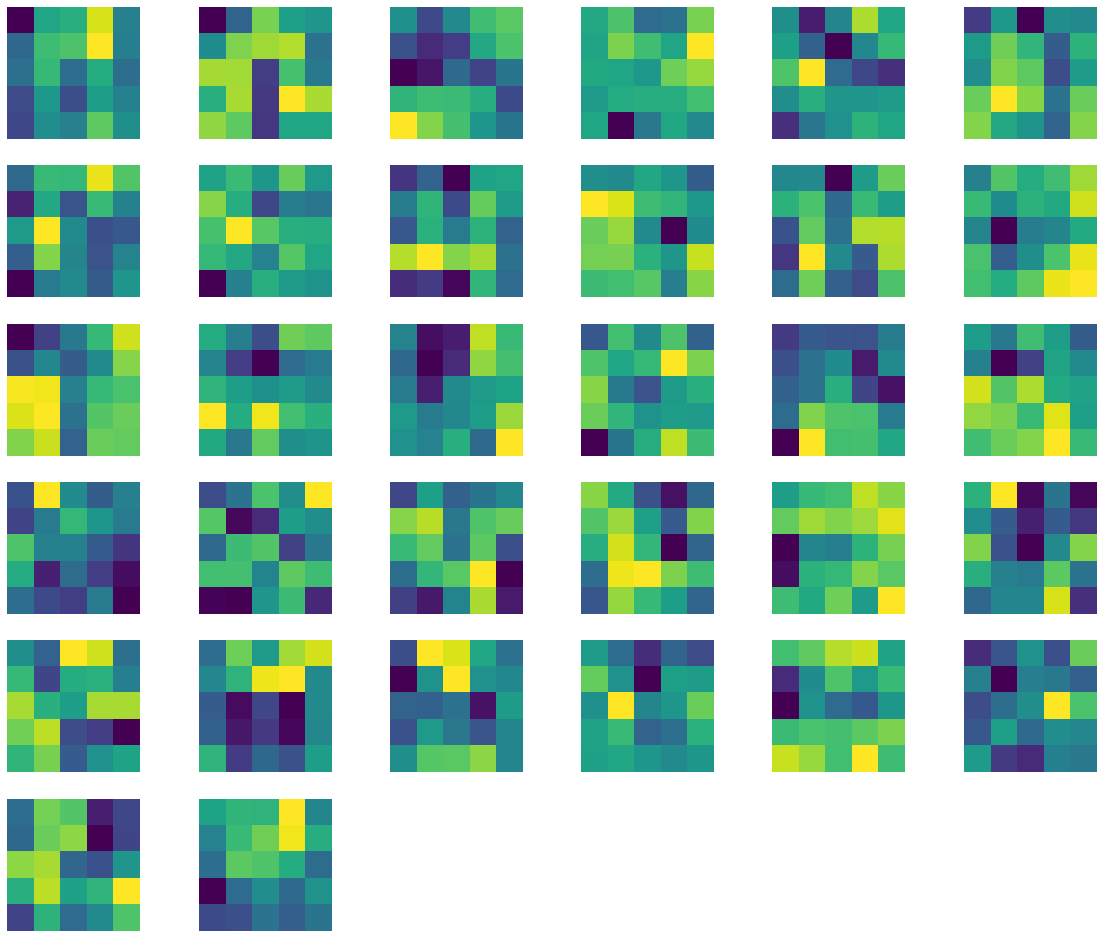

In [ ]:
# visualizar los filtros aprendidos de la primera capa de convolución
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[1]):
    plt.subplot(6, 6, i+1) # filtros de 5x5 con un total de 32 SHAPE: torch.Size([32, 16, 5, 5])
    plt.imshow(filter[0, :, :].detach().cpu().numpy(), cmap='viridis') # convertir el tensor a numpy array
    plt.axis('off') # no visualizar los ejes
    plt.savefig('32_filtros.png')
plt.show()

# Ejercicio
Modificar la CNN
*   Agregar una tercera capa de Convolución. Las capas convolucionales serán definidas:
    *   CONV1 16 con Kernel 3
    *   CONV2 32 con Kernel 5
    *   CONV3 64 con Kernel 5

*   Calcular Tabla de parámetros

